In [1]:
import pandas as pd 
import numpy as np 
import json 

<h4>Prepare Datasets</h4>

In [2]:
restaurants = pd.read_csv('restaurants.csv')
restaurants.shape

(8069, 49)

In [3]:
review_file_id = {'yelp_academic_dataset_review.json'}
user_file_id = {'yelp_academic_dataset_user.json'}

In [4]:
review_data = []

for filename in review_file_id:
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            review_data.append(json.loads(line.strip()))

# Create a DataFrame from the review_data
review_data_raw = pd.DataFrame(review_data)
print("Dataframe Shape:", review_data_raw.shape)
review_data_raw.head(3)

Dataframe Shape: (6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [5]:
pa_business_ids = set(restaurants['business_id'])
pa_reviews = review_data_raw[review_data_raw['business_id'].isin(pa_business_ids)].copy()
print("Filtered Pennsylvania Reviews Shape:", pa_reviews.shape)

Filtered Pennsylvania Reviews Shape: (836680, 9)


In [6]:
pa_user_ids = set(pa_reviews['user_id'])
print(len(pa_user_ids))

269462


In [7]:
user_data = []

for filename in user_file_id:
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            user_data.append(json.loads(line.strip()))

# Create a DataFrame from the review_data
user_data_raw = pd.DataFrame(user_data)
print("Dataframe Shape:", user_data_raw.shape)
user_data_raw.head(3)

Dataframe Shape: (1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18


<h4>Users with time difference and average rating</h4>

In [8]:
df_r = review_data_raw.copy()
df_r['date'] = pd.to_datetime(df_r['date'])
df_r.sort_values(by=['user_id', 'date'], inplace=True)
df_c = df_r.groupby('user_id')['date'].diff().dt.days.groupby(df_r['user_id']).mean().reset_index()
df_c.columns = ['user_id', 'time_diff']
df_c.loc[df_c['time_diff'] == 0, 'time_diff'] = np.nan
print(df_c.info())
average_given_rating = df_r.groupby('user_id')['stars'].mean().reset_index()
df_c = df_c.merge(average_given_rating, on='user_id', how='left')
df_c.rename(columns={'stars': 'average_given_rating'}, inplace=True)
print(df_c.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987929 entries, 0 to 1987928
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   time_diff  float64
dtypes: float64(1), object(1)
memory usage: 30.3+ MB
None
                  user_id   time_diff  average_given_rating
0  ---1lKK3aKOuomHnwAkAow         NaN              5.000000
1  ---2PmXbF47D870stH1jqA   87.555556              5.000000
2  ---UgP94gokyCDuB5zUssA  250.700000              3.636364
3  ---fa6ZK37T9NjkGKI4oSg         NaN              1.000000
4  ---r61b7EpVPkb4UVme5tA  265.500000              4.000000


In [47]:
df_c_pa = df_c[df_c['user_id'].isin(pa_user_ids)]
print(df_c_pa.shape)
print(df_c_pa.nunique())

(269462, 3)
user_id                 269462
time_diff                36437
average_given_rating      4387
dtype: int64


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

/var/folders/6m/51l9cwxd4px017cch8f2654r0000gn/T/ipykernel_9168/1634094573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_c['average_given_rating'].fillna(df_c['average_given_rating'].mean(), inplace=True)
/var/folders/6m/51l9cwxd4px017cch8f2654r0000gn/T/ipykernel_9168/1634094573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

<Axes: xlabel='average_given_rating', ylabel='time_diff'>

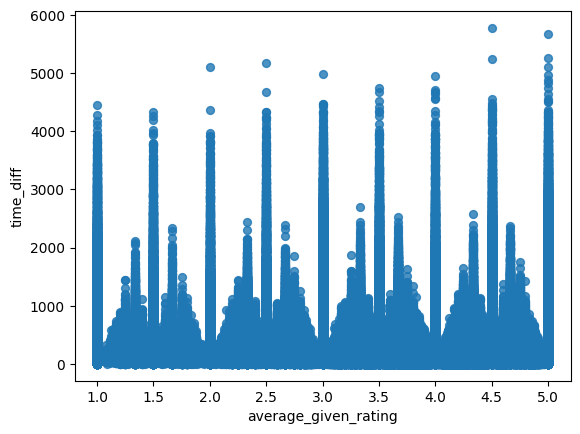

In [55]:
df_c['average_given_rating'].fillna(df_c['average_given_rating'].mean(), inplace=True)
df_c['time_diff'].fillna(df_c['time_diff'].mean(), inplace=True)

# We will be doing the customer clustering based on the 2 customer behaviour features that you have created in Task 1
cluster_features = df_c[['average_given_rating', 'time_diff']]
# Create scatter plot on `time_diff_hours` against `average_spending` for visualisation
cluster_features.plot(kind='scatter', x='average_given_rating', y='time_diff', s=32, alpha=.8)

In [56]:
scaler = StandardScaler()
# Fit and transform the numerical data
scaled_data = scaler.fit_transform(cluster_features[['average_given_rating', 'time_diff']])
# Store the scaled data features into a dataframe
scaled_cluster_features = pd.DataFrame(scaled_data, columns=['average_given_rating', 'time_diff'])

In [57]:
df_matrix = scaled_cluster_features.to_numpy()

# Choose optimal K using Elbow method
cost = []

# Loop across every possible cluster
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, random_state = 0)

    # Fit and predict each customer's cluster
    kmeans.fit_predict(df_matrix)

    # Store the cost, with the element's index being the cluster number
    cost.append(kmeans.inertia_)
    print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [58]:
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost':cost})

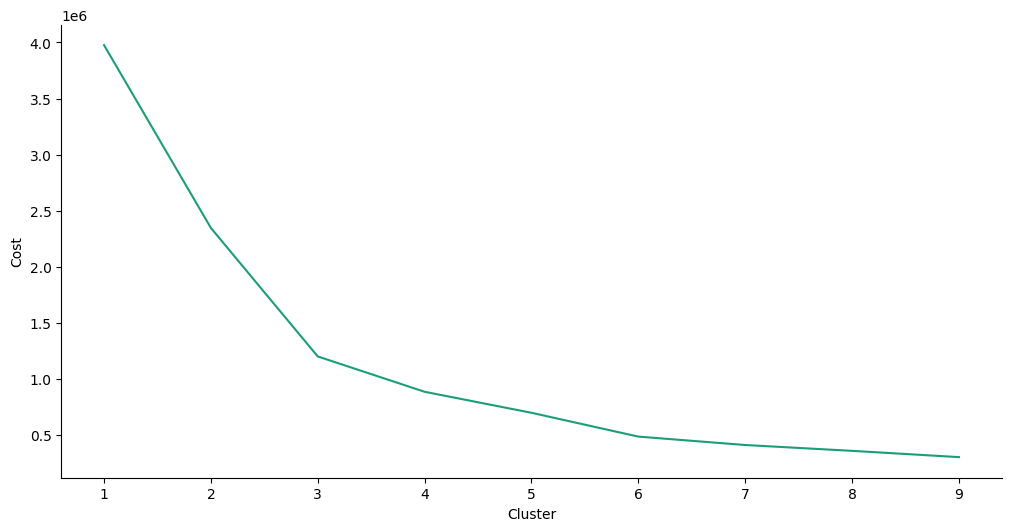

In [59]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  # x series
  xs = series['Cluster']
  # y series
  ys = series['Cost']
  # plot
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort by ascending order of cluster
df_sorted = df_cost.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Cost')

In [60]:
# Using the elbow method, the optimal number of clusters to choose is 3.
kmeans = KMeans(n_clusters = 3, random_state = 0)
# Fits the cluster_features and retrieve the Cluster Assignment predictions of each customer
kmeans.fit_predict(df_matrix)

array([0, 0, 0, ..., 0, 1, 0], shape=(1987929,), dtype=int32)

In [61]:
cluster_features['cluster'] = kmeans.labels_

<Axes: xlabel='average_given_rating', ylabel='time_diff'>

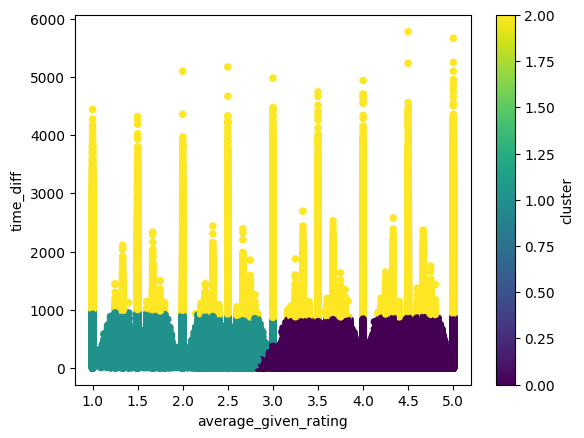

In [62]:
cluster_features.plot(kind='scatter', x='average_given_rating', y='time_diff', c = 'cluster', colormap = 'viridis')

<Axes: xlabel='time_diff', ylabel='average_given_rating'>

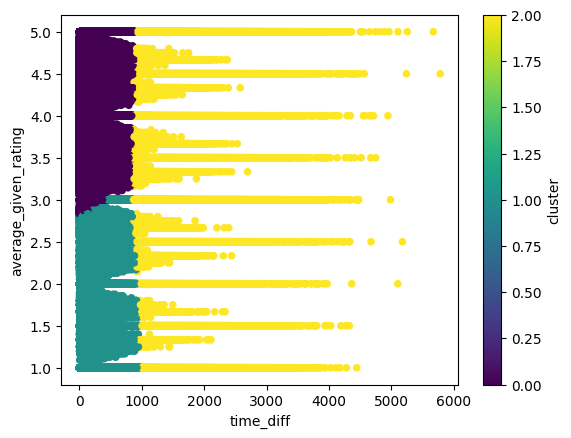

In [63]:
cluster_features.plot(kind='scatter', x='time_diff', y='average_given_rating', c = 'cluster', colormap = 'viridis')

<h4>Users with review counts and average rating</h4>

In [19]:
df_c_pa2 = df_c_pa.drop(['time_diff', 'cluster'], axis=1)
user_data = user_data_raw.copy()
review_count = user_data[['user_id', 'review_count']]
df_c_pa2 = df_c_pa2.merge(review_count, on='user_id', how='left')

,user_id,average_given_rating,review_count
0,---r61b7EpVPkb4UVme5tA,4.000000,6.0
1,--1oopX4BmrQEB_cW2dFVA,2.000000,1.0
2,--1vcleKg-_ORilNx_RaDw,5.000000,3.0
3,--2tyArRmSoyKx5r-FVG0A,3.000000,8.0
4,--2vR0DIsmQ6WfcSzKWigw,4.363636,1534.0
...,...,...,...
269457,zzwTBixpqjeAD_IkMlby0g,5.000000,1.0
269458,zzwYLnmIvj8C7wJmRjtkRA,5.000000,19.0
269459,zzx7J3zheFF3zf5YYfDAMg,5.000000,3.0
269460,zzxCh58BAynQseL1rUlJqg,3.000000,21.0


<Axes: xlabel='review_count', ylabel='average_given_rating'>

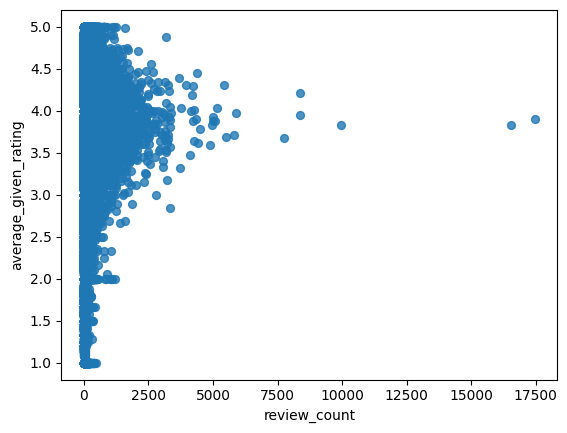

In [41]:
df_c_pa2['review_count'].fillna(df_c_pa2['review_count'].mean(), inplace=True)
# We will be doing the customer clustering based on the 2 customer behaviour features that you have created in Task 1
cluster_features = df_c_pa2[['review_count', 'average_given_rating']]
# Create scatter plot on `time_diff_hours` against `average_spending` for visualisation
cluster_features.plot(kind='scatter', x='review_count', y='average_given_rating', s=32, alpha=.8)

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_features[['review_count', 'average_given_rating']])
scaled_cluster_features = pd.DataFrame(scaled_data, columns=['review_count', 'average_given_rating'])
df_matrix = scaled_cluster_features.to_numpy()
cost = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, random_state = 0)
    # Fit and predict each customer's cluster
    kmeans.fit_predict(df_matrix)
    # Store the cost, with the element's index being the cluster number
    cost.append(kmeans.inertia_)
    print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [43]:
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost':cost})

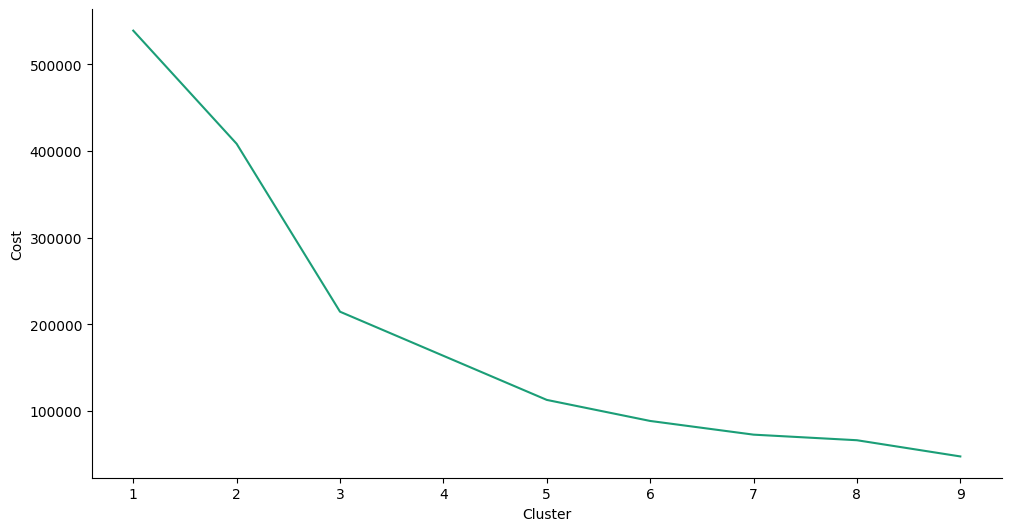

In [44]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  # x series
  xs = series['Cluster']
  # y series
  ys = series['Cost']
  # plot
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort by ascending order of cluster
df_sorted = df_cost.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Cost')

/var/folders/6m/51l9cwxd4px017cch8f2654r0000gn/T/ipykernel_9168/1715381179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features['cluster'] = kmeans.labels_


<Axes: xlabel='review_count', ylabel='average_given_rating'>

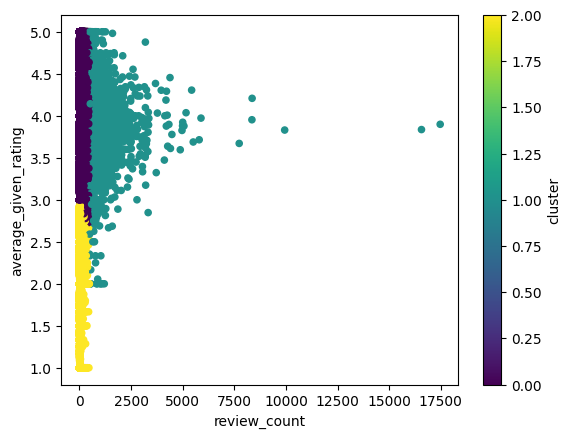

In [45]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit_predict(df_matrix)
cluster_features['cluster'] = kmeans.labels_
cluster_features.plot(kind='scatter', x='review_count', y='average_given_rating', c = 'cluster', colormap = 'viridis')

<Axes: xlabel='average_given_rating', ylabel='review_count'>

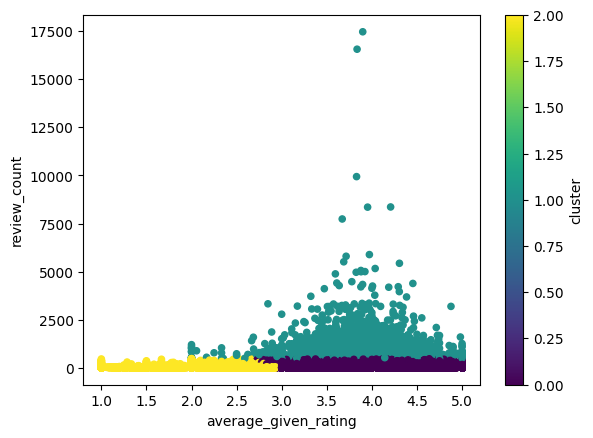

In [46]:
cluster_features.plot(kind='scatter', x='average_given_rating', y='review_count', c = 'cluster', colormap = 'viridis')